<a href="https://colab.research.google.com/github/harshanirliyanage/DL-LAB-02-/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For heatmap visualization
import numpy as np


Load the MNIST dataset

In [81]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [5 5 4 1 7 2 7 0 9 6]


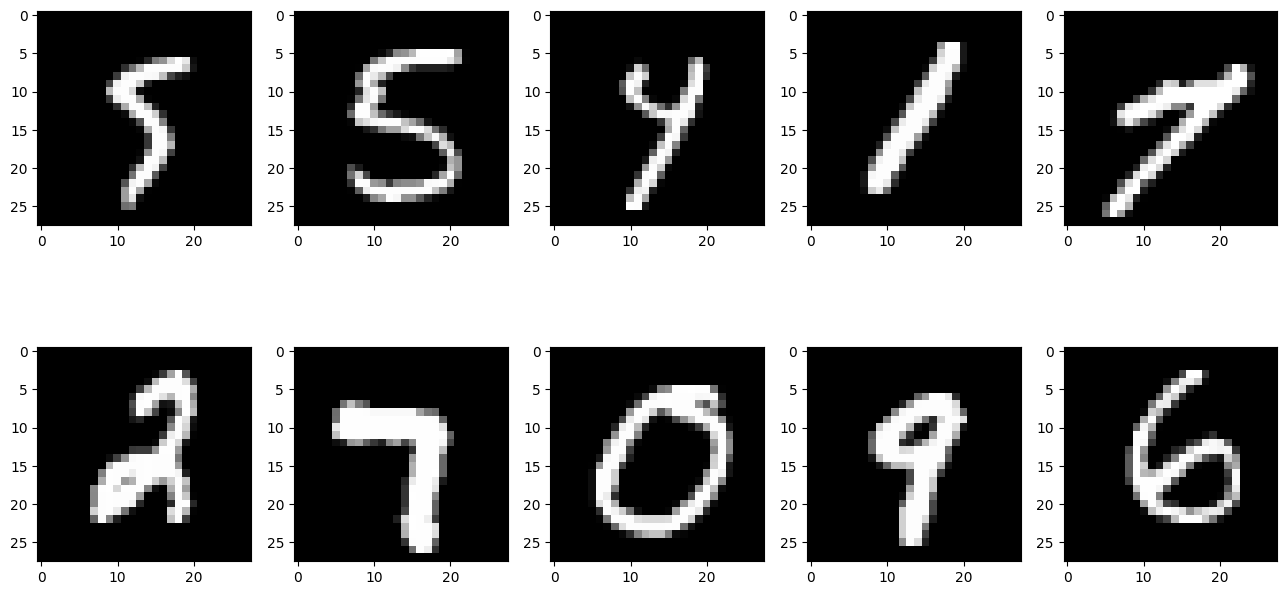

In [82]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [83]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [84]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu',
                kernel_regularizer=l2(0.01)))  # L2 with lambda=0.01
model.add(Dense(128, activation='relu',
                kernel_regularizer=l1(0.001)))  # L1 with lambda=0.001
model.add(Dense(64, activation='relu',
                kernel_regularizer=l2(0.01)))  # Mix L1/L2 as needed
model.add(Dense(10, activation='softmax'))
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [85]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [86]:
train_info = model.fit(new_train_data, new_train_target,
                       epochs=30,
                       batch_size=256,
                       validation_split=0.15)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7036 - loss: 5.6001 - val_accuracy: 0.9159 - val_loss: 1.8235
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9115 - loss: 1.5976 - val_accuracy: 0.9266 - val_loss: 1.1164
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9150 - loss: 1.0786 - val_accuracy: 0.9248 - val_loss: 0.8918
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9174 - loss: 0.8890 - val_accuracy: 0.9307 - val_loss: 0.7698
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9261 - loss: 0.7736 - val_accuracy: 0.9359 - val_loss: 0.6938
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9298 - loss: 0.7051 - val_accuracy: 0.9392 - val_loss: 0.6401
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9346 - loss: 0.6485 - val_accuracy: 0.9431 - val_loss: 0.5955
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9338 - loss: 0.6154 - val_accu

Plot the loss and accuracy graphs

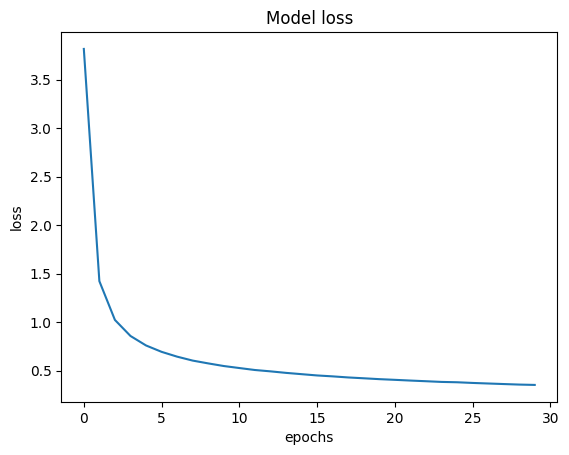

In [87]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

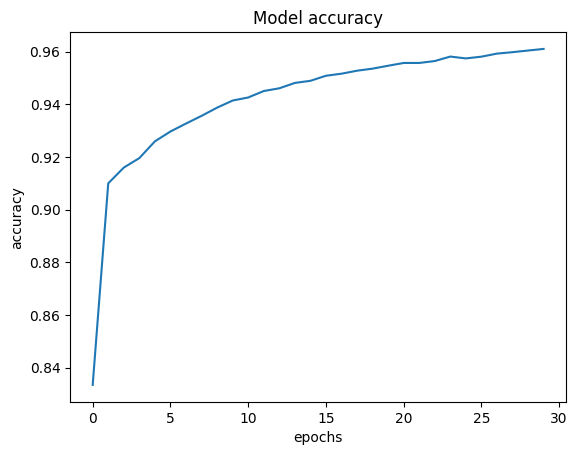

In [88]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [89]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 0.3703
Loss of the Test dataset is: 0.350105881690979
Accuracy of the test dataset is: 0.9605000019073486


In [90]:
# Get predictions (argmax for class labels)
predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(new_test_target, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


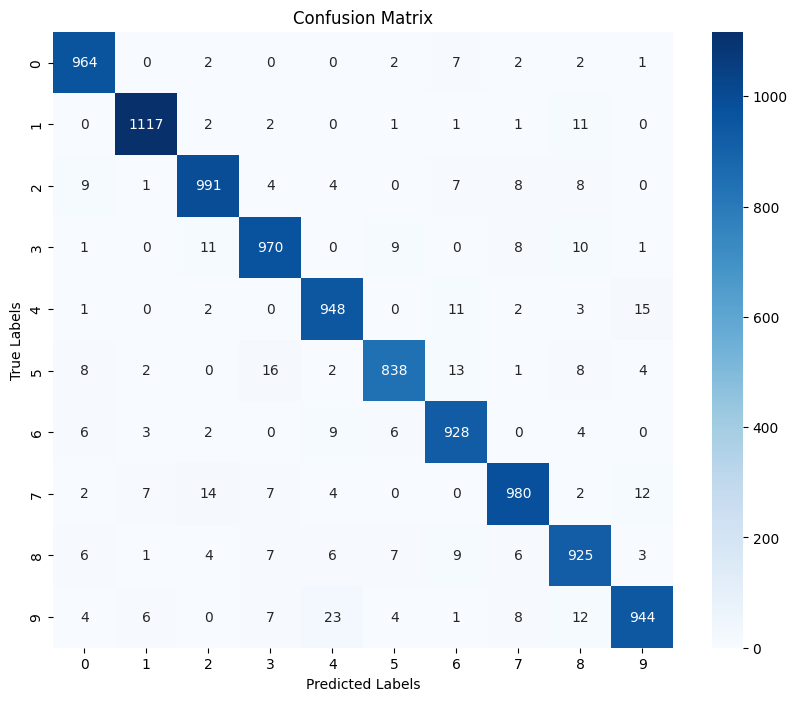

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Save the model weights

In [92]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')
